## Excel Data Analysis with Python

This notebook describes a workflow for data analysis with Python and Excel. The purpose of this workflow is to prototype a method that can be extended to Excel to distribute to end users who aren't familiar with Python. This allows for more robust analysis with a ubiquitous front-end in Excel.

After doing the analysis, the code in the IPython Notebook would then be transferred to production in order to leverage packages that have been around longer and thus have more functionality such as formatting, tables, etc. These include <a href="http://www.python-excel.org/">xlwt, xlrd</a> and <a href="https://xlsxwriter.readthedocs.org/">Xlsxwriter</a>.

The following is based on the statsmodel ARMA model example with a different dataset.

### Getting Started

Load Pylab inline to view matplotlib charts

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Import required libraries for analysis

In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from IPython.display import Image

In [2]:
from statsmodels.graphics.api import qqplot

xlwings is a Python library that allows interaction with Excel and IPython Notebooks. It has support for range, workbook and chart objects that can be read and written through a notebook. It is a new library so there isn't a whole lot of features, but it works great for prototyping interaction with Excel.

In [9]:
from IPython.display import HTML
HTML('<iframe src=http://xlwings.org/ width=800 height=300></iframe>')

Import xlwings and open a new Excel sheet. These must be placed in the same cell in order to load properly.

In [3]:
from xlwings import Range, Workbook, Chart
wb = Workbook()

Loading Data into Python and Excel

The dataset used is from R's standard dataset library. The datasets can be found on Github here: <a href="https://github.com/vincentarelbundock/Rdatasets">R datasets</a>.  The data represents annual lynx captures from 1821 to 1934. It includes only 114 records, so our fit might not be that great. If the data was by month or by week, it might yield a better model. However, the data's short and interesting so it'll work great for our purpose!

In [20]:
lynx = pd.read_csv('C:\Users\Aaron\Google_Drive\Projects\Datasets\Rdata\datasets\lynx.csv')

In [21]:
lynx

,Unnamed: 0,time,lynx
0,1,1821,269
1,2,1822,321
2,3,1823,585
3,4,1824,871
4,5,1825,1475
5,6,1826,2821
6,7,1827,3928
7,8,1828,5943
8,9,1829,4950
9,10,1830,2577


### Load the Data into Excel

Copy the lynx object into Excel by using the Range object. The DataFrame will be copied starting at cell A1.

In [7]:
Range('A1').value = lynx

For an Excel chart, we don't really need Columns A and B. Those columns can be deleted using clear_contents(). 

In [8]:
Range('A1').vertical.clear_contents()
Range('B1').vertical.clear_contents()

To create a line chart, the chart first needs to be initialized in Excel. The chart name is then passed into the Chart object.

In [11]:
Chart('Chart 1').set_source_data(Range('D1').vertical)

In [13]:
Image(url='http://www.aaronschlegel.com/wp-content/uploads/2014/06/lynxlinechart.png')

If a chart is not initialized, it will default to a column chart. To add a chart without initializing, you can use Chart().add() 

In [14]:
Chart().add().set_source_data(Range('D1').vertical)

In [15]:
Image(url='http://www.aaronschlegel.com/wp-content/uploads/2014/06/columnchart.png')

In [22]:
lynx = lynx.drop(['Unnamed: 0', 'time'], axis=1)

In [23]:
lynx.columns = ['Lynx Captures']

In [24]:
lynx

,Lynx Captures
0,269
1,321
2,585
3,871
4,1475
5,2821
6,3928
7,5943
8,4950
9,2577


Copy lynx data in Excel sheet starting at cell A1. As the data is set as a pandas DataFrame, the index column will be copied as well.

In [25]:
lynx.plot(figsize=(12,8))

In [26]:
lynx.index = pd.Index(sm.tsa.datetools.dates_from_range('1821', '1934'))

In [27]:
lynx.plot(figsize(10,8))

NameError: name 'figsize' is not defined

In [28]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(lynx.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(lynx, lags=40, ax=ax2)

In [29]:
arma212 = sm.tsa.ARMA(lynx, (2,1,2)).fit()
print(arma212.params)

const                  1546.541247
ar.L1.Lynx Captures       1.312878
ar.L2.Lynx Captures      -0.712779
ma.L1.Lynx Captures      -0.275909
dtype: float64


In [30]:
print(arma212.aic, arma212.bic, arma212.hqic)

1879.45889466 1893.1398869 1885.01124265


Copy the parameter information into Excel for users to determine goodness-of-fit.

In [31]:
Range('J2').value = "Akaide Information Criterion (AIC)"
Range('K2').value = arma212.aic

Range('J3').value = "Bayesian Information Criterion (BIC)"
Range('K3').value = arma212.bic

Range('J4').value = "Hannan-Quinn Information Criterion (HQIC)"
Range('K4').value = arma212.hqic

In [32]:
Image(url='http://www.aaronschlegel.com/wp-content/uploads/2014/06/aicbichqic.png')

In [33]:
sm.stats.durbin_watson(arma212.resid.values)

1.8611995418908274

Add Durbin-Watson test result in Excel

In [34]:
Range('J5').value = "Durbin-Watson test"
Range('K5').value = sm.stats.durbin_watson(arma212.resid.values)

Copy residuals into Excel as a DataFrame. The original residuals object was an array, which is copied left-to-right by xlwings.

In [35]:
arma_residual = DataFrame(arma212.resid.values)

In [36]:
Range('M1').value = arma_residual
Range('N1').value = "Residuals"

In [37]:
Image(url='http://www.aaronschlegel.com/wp-content/uploads/2014/06/residuals.png')

In [38]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma212.resid.plot(ax=ax)

In [39]:
residual = arma212.resid

In [40]:
stats.normaltest(residual)

(24.654801694301277, 4.4287160476324091e-06)

In [41]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(residual, line='q', ax=ax, fit=True)

In [42]:
r, q, p = sm.tsa.acf(residual.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

           AC          Q  Prob(>Q)
lag                               
1    0.058023   0.393992  0.530208
2   -0.197533   5.001066  0.082041
3    0.058472   5.408380  0.144222
4    0.080439   6.186242  0.185665
5    0.053773   6.537048  0.257409
6    0.000820   6.537130  0.365779
7   -0.215672  12.285797  0.091543
8   -0.020543  12.338445  0.136730
9    0.234537  19.266279  0.023022
10   0.151492  22.184446  0.014192
11  -0.076635  22.938466  0.018032
12  -0.066415  23.510337  0.023693
13  -0.123466  25.506213  0.019789
14  -0.048711  25.819985  0.027284
15   0.002392  25.820749  0.039950
16  -0.118694  27.721815  0.034125
17  -0.194481  32.878204  0.011679
18   0.012396  32.899369  0.017164
19   0.178958  37.357368  0.007157
20   0.063380  37.922481  0.009051
21  -0.024635  38.008774  0.012858
22  -0.098950  39.416141  0.012639
23  -0.066149  40.052009  0.015164
24  -0.026779  40.157376  0.020569
25   0.006791  40.164229  0.028051
26  -0.102054  41.729324  0.026171
27  -0.136035  44.54

Copy lag, autocorrelation, and q values into Excel

In [43]:
Range('P1').value = table

In [44]:
Image(url='http://www.aaronschlegel.com/wp-content/uploads/2014/06/lag_input.png')

In [47]:
insample_lynx = arma212.predict('1920', '1934', dynamic=True)
print(insample_lynx)

1920-12-31     662.492124
1921-12-31    1431.212456
1922-12-31    2025.260222
1923-12-31    2257.244705
1924-12-31    2138.387257
1925-12-31    1816.988299
1926-12-31    1479.749820
1927-12-31    1266.083303
1928-12-31    1225.941754
1929-12-31    1325.537795
1930-12-31    1484.907279
1931-12-31    1623.149981
1932-12-31    1691.050548
1933-12-31    1681.659213
1934-12-31    1620.931442
Freq: A-DEC, dtype: float64


Copy the in-sample predicted values into Excel

In [48]:
Range('V1').value = DataFrame(insample_lynx)
Range('W1').value = "Predicted In-Sample Values"

In [49]:
Image(url='http://www.aaronschlegel.com/wp-content/uploads/2014/06/in-sample_prediction.png')

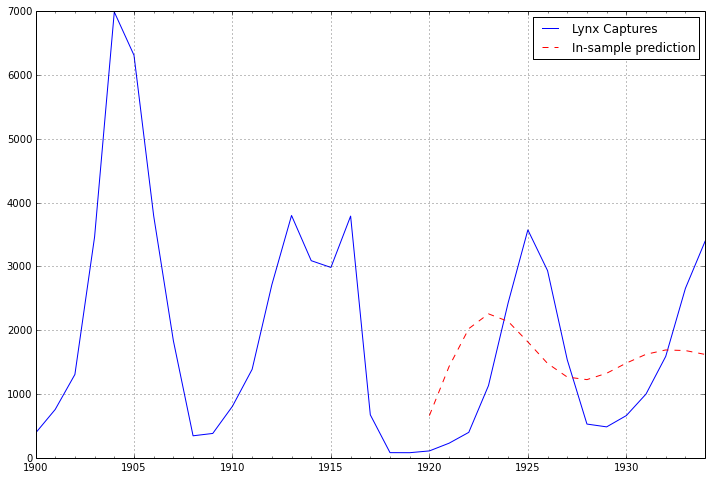

In [103]:
ax = lynx.ix['1900':].plot(figsize=(12,8))
ax = insample_lynx.plot(ax=ax, style='r--', label="In-sample prediction");
ax.legend();

So yeah, not the best model, but let's continue on like it is.

Initialize Excel line chart to add predicted values.

In [104]:
Chart('Chart 4').set_source_data(Range('W2').vertical)

Since the predicted values are in sample, a more desired output would be to put the predicted values in the same chart as the observed; however, this functionality does not yet exist (that I know of) and would need to be done with a different package.

In [105]:
def forecast_err(y, yh):
    return y.sub(yh).mean()

In [107]:
error = forecast_err(lynx['Lynx Captures'], insample_lynx)

Enter forecast error into Excel

In [108]:
Range('J6').value = "Average Forecast Error"
Range('K6').value = error

### Summary

The purpose of this notebook is to test a workflow to implement Python and Excel for better data analysis. Xlwings is a great tool for  this workflow as it allows interaction between an IPython notebook and Excel. However, since it is relatively new and thus does not have as much functionality as other packages that have been around longer, it may be necessary to use packages such as xlwt/xlrt in development.

My next test for this workflow is to fully integrate the ARMA forecasting experiment with Excel. Due to Excel's saturation in the marketplace, and with the recent improvements in Excel 2013, I think there is great potential to use it as a front-end for better analytics built in Python and R.

In [1]:
from IPython.core.display import HTML
def css():
    style = open("css/custom.css", "r").read()
    return HTML(style)
css()